[결정트리 알고리즘 기반 모델]
- 데이터셋의 feature(특성) 기준으로 데이터 분류
- 질문 방식으로 Yes/No 결과에 따라 데이터셋 분리
- 장점: 스케일링, 정규화 등 전처리 결과에 영향을 적게 받음, 가독성 높은 알고리즘
- 단점: 과대적합(=> 해결을 위해 많은 하이퍼 파라미터 존재)
- 다른 머신러닝 알고리즘에 비해 좋지 않은 성능 but, 여러 개의 decision tree가 모이면 성능 강해짐 => ensemble에 주로 사용됨

1) 모듈 로딩 및 데이터 준비

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [4]:
feature_df,target_sr=load_iris(as_frame=True,return_X_y=True)

print(f'feature_df: {feature_df.shape}, {feature_df.ndim}d')
print(f'target_sr: {target_sr.shape}, {target_sr.ndim}d')

feature_df: (150, 4), 2d
target_sr: (150,), 1d


2) 학습용 데이터셋 준비

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_sr,random_state=10,stratify=target_sr)

In [7]:
print(f'x_train: {x_train.shape}, {x_train.ndim}d')
print(f'x_test: {x_test.shape}, {x_test.ndim}d')
print()
print(f'y_train: {y_train.shape}, {y_train.ndim}d')
print(f'y_test: {y_test.shape}, {y_test.ndim}d')

x_train: (112, 4), 2d
x_test: (38, 4), 2d

y_train: (112,), 1d
y_test: (38,), 1d


3) 학습 진행 (튜닝 X)

In [8]:
dt_model=DecisionTreeClassifier(random_state=10)

dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [9]:
#모델 파라미터: 학습 fit( ) 후에 학습용 데이터 셋을 기반으로 설정된 값
print('[dt_model.classes_]',dt_model.classes_)
print('[dt_model.n_classes]',dt_model.n_classes_,'개')
print('[dt_model.max_features_]',dt_model.max_features_,'개')
print('[dt_model.feature_importances_]',dt_model.feature_importances_)

[dt_model.classes_] [0 1 2]
[dt_model.n_classes] 3 개
[dt_model.max_features_] 4 개
[dt_model.feature_importances_] [0.03125249 0.         0.06844775 0.90029976]


4) 성능 평가

In [10]:
#학습용 데이터셋에 대한 성능
train_score=dt_model.score(x_train,y_train)

#테스트용 데이터셋에 대한 성능
test_score=dt_model.score(x_test,y_test)

In [11]:
print('[train score]',train_score)
print('[test score]',test_score)

[train score] 1.0
[test score] 1.0


5) 교차검증: 데이터셋 부족, 과대적합을 해결하고자

In [12]:
from sklearn.model_selection import StratifiedKFold,cross_validate

In [13]:
#교차검증 준비: 모델 인스턴스, train_ds, cv(default 5))
model=DecisionTreeClassifier(random_state=10)
result=cross_validate(model,x_train,y_train,return_train_score=True,return_estimator=True)

In [14]:
result_df=pd.DataFrame(result)
result_df

,fit_time,score_time,estimator,test_score,train_score
0,0.002988,0.000998,DecisionTreeClassifier(random_state=10),0.956522,1.0
1,0.001993,0.000997,DecisionTreeClassifier(random_state=10),0.956522,1.0
2,0.000996,0.000997,DecisionTreeClassifier(random_state=10),0.954545,1.0
3,0.000997,0.001505,DecisionTreeClassifier(random_state=10),0.909091,1.0
4,0.001993,0.000996,DecisionTreeClassifier(random_state=10),0.909091,1.0


6) 성능 향상을 위한 튜닝: 하이퍼 파라미터 설정

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
params={'max_depth':[4,3,2,1],
        'min_samples_leaf':[5,3,2]}

In [17]:
#refit=True: best estimator로 재학습
gscv=GridSearchCV(DecisionTreeClassifier(),param_grid=params,refit=True,return_train_score=True)
gscv.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 3, 2, 1],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [18]:
#모델 파라미터 확인
print('[gscv.best_params_]',gscv.best_params_)
print('[gscv.best_score_]',gscv.best_score_)
print('[gscv.best_estimator_]',gscv.best_estimator_)
#print('[gscv.cv_results_]',gscv.cv_results_)
cv_result_df=pd.DataFrame(gscv.cv_results_)
cv_result_df.head()

[gscv.best_params_] {'max_depth': 4, 'min_samples_leaf': 2}
[gscv.best_score_] 0.9371541501976285
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=4, min_samples_leaf=2)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001397,0.000491,0.000996,7.026515e-06,4,5,"{'max_depth': 4, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
1,0.001796,0.000400,0.000995,3.309126e-06,4,3,"{'max_depth': 4, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.977528,0.977778,0.966667,0.977778,0.970961,0.009027
2,0.001396,0.000488,0.000997,3.989506e-07,4,2,"{'max_depth': 4, 'min_samples_leaf': 2}",0.956522,0.956522,0.954545,...,0.937154,0.022925,1,0.977528,0.977528,0.966667,0.977778,0.977778,0.975456,0.004396
3,0.001195,0.000396,0.000997,1.168008e-07,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.913043,0.956522,0.954545,...,0.928458,0.036299,2,0.955056,0.943820,0.966667,0.955556,0.966667,0.957553,0.008543
4,0.001196,0.000399,0.000997,2.431402e-07,3,3,"{'max_depth': 3, 'min_samples_leaf': 3}",0.913043,0.956522,0.954545,...,0.919368,0.034262,7,0.955056,0.955056,0.944444,0.955556,0.977778,0.957578,0.010930


In [19]:
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [20]:
best_model=gscv.best_estimator_
print('[best_model.max_depth]',best_model.max_depth)
print('[best_model.min_samples_leaf]',best_model.min_samples_leaf)

[best_model.max_depth] 4
[best_model.min_samples_leaf] 2


In [21]:
#feature 중요도 및 개수
best_model.feature_importances_,best_model.n_features_in_

(array([0.01321873, 0.        , 0.59964451, 0.38713677]), 4)

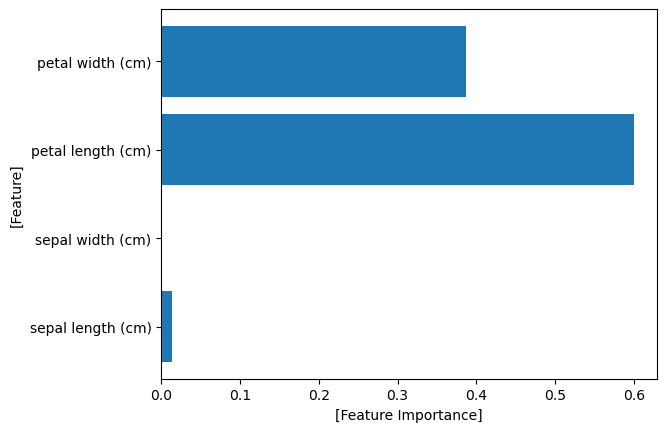

In [22]:
import matplotlib.pyplot as plt

plt.barh(range(best_model.n_features_in_),best_model.feature_importances_,align='center')
plt.yticks(np.arange(best_model.n_features_in_),best_model.feature_names_in_)
plt.xlabel('[Feature Importance]')
plt.ylabel('[Feature]')
plt.show()

[Decision Tree 그래프 시각화]
- w. graphviz

1) Decision Tree -> dot 포맷 파일로 저장
- export_graphviz( )

In [30]:
from sklearn.tree import export_graphviz

export_graphviz(best_model,out_file='tree.dot',
                class_names=['setosa','versicolor','verginica'], feature_names=best_model.feature_names_in_,
                impurity=True,filled=True,rounded=True)

2) dot 파일 출력

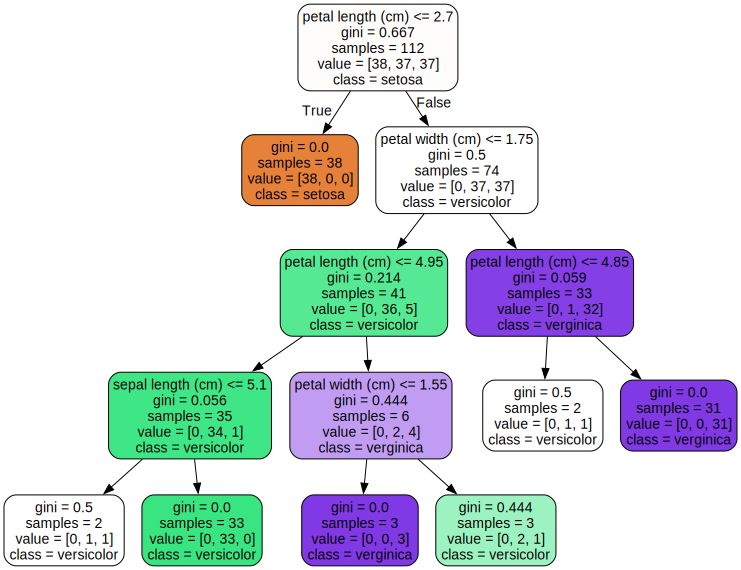

In [31]:
import graphviz

#파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

#화면에 출력
graphviz.Source(dot_data)

6) 새로운 데이터 예측

In [33]:
new_data=feature_df.iloc[:1]+0.21
new_data.shape

(1, 4)

In [34]:
best_model.predict(new_data)

array([0])

In [35]:
best_model.predict_proba(new_data)

array([[1., 0., 0.]])